Original Training: 3060
Balanced Training: 4638


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Using device: cuda


config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaModel were not initialized from the model checkpoint at l3cube-pune/hing-roberta and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]


Validation 1/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 1
Train Loss: 0.1585, Accuracy: 0.5306, F1: 0.5924, Precision: 0.5177, Recall: 0.6923
Val Loss: 0.0830, Accuracy: 0.3193, F1: 0.4045, Precision: 0.2565, Recall: 0.9555


Validation 2/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 2
Train Loss: 0.1023, Accuracy: 0.5455, F1: 0.6287, Precision: 0.5225, Recall: 0.7891
Val Loss: 0.0681, Accuracy: 0.3643, F1: 0.4169, Precision: 0.2679, Recall: 0.9393


Validation 3/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 3
Train Loss: 0.0654, Accuracy: 0.6777, F1: 0.7342, Precision: 0.6280, Recall: 0.8836
Val Loss: 0.0513, Accuracy: 0.6895, F1: 0.5554, Precision: 0.4249, Recall: 0.8016


Validation 4/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 4
Train Loss: 0.0508, Accuracy: 0.7792, F1: 0.8062, Precision: 0.7179, Recall: 0.9193
Val Loss: 0.0709, Accuracy: 0.7953, F1: 0.5812, Precision: 0.5754, Recall: 0.5870


Validation 5/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 5
Train Loss: 0.0414, Accuracy: 0.8284, F1: 0.8443, Precision: 0.7672, Recall: 0.9387
Val Loss: 0.0950, Accuracy: 0.7796, F1: 0.5648, Precision: 0.5407, Recall: 0.5911


Validation 6/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 6
Train Loss: 0.0276, Accuracy: 0.8948, F1: 0.9027, Precision: 0.8547, Recall: 0.9565
Val Loss: 0.1550, Accuracy: 0.8002, F1: 0.5750, Precision: 0.5923, Recall: 0.5587


Validation 7/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 7
Train Loss: 0.0205, Accuracy: 0.9323, F1: 0.9346, Precision: 0.9055, Recall: 0.9656
Val Loss: 0.2033, Accuracy: 0.7963, F1: 0.5738, Precision: 0.5809, Recall: 0.5668


Validation 8/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 8
Train Loss: 0.0155, Accuracy: 0.9446, F1: 0.9467, Precision: 0.9209, Recall: 0.9740
Val Loss: 0.1952, Accuracy: 0.7835, F1: 0.5443, Precision: 0.5546, Recall: 0.5344


Validation 9/15: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]



Epoch 9
Train Loss: 0.0127, Accuracy: 0.9657, F1: 0.9662, Precision: 0.9506, Recall: 0.9823
Val Loss: 0.2063, Accuracy: 0.7933, F1: 0.5539, Precision: 0.5796, Recall: 0.5304
Early stopping triggered


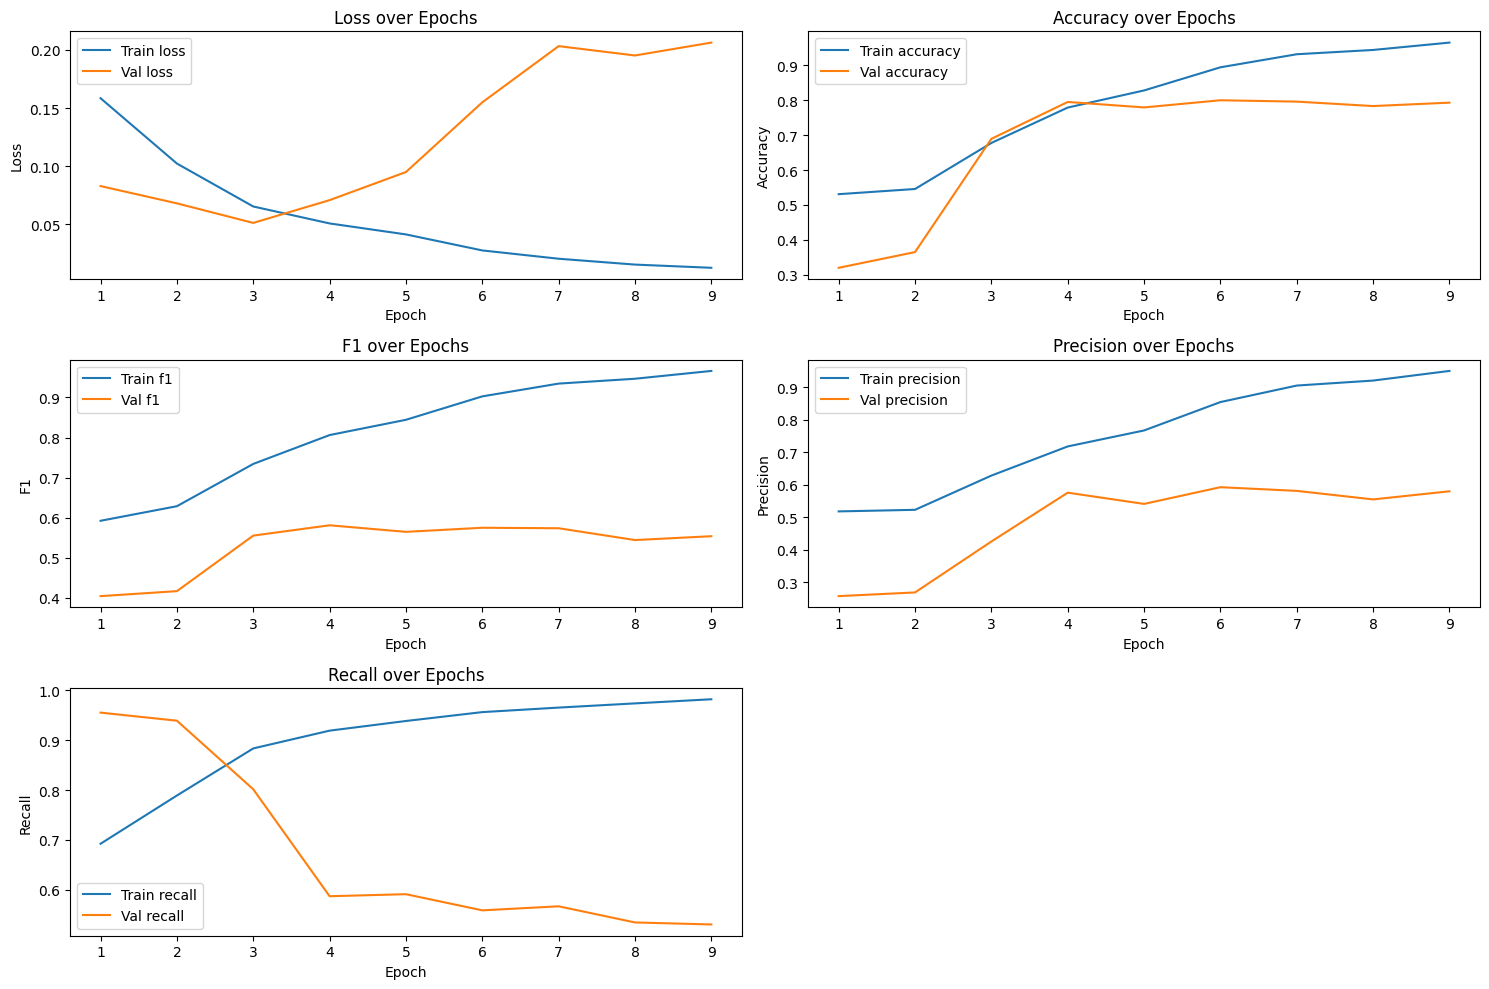

Final Evaluation: 100%|██████████| 64/64 [00:26<00:00,  2.41it/s]


Final Metrics (with optimal threshold):
Threshold: 0.4368
Accuracy: 0.7698
F1: 0.5899
Precision: 0.5184
Recall: 0.6842


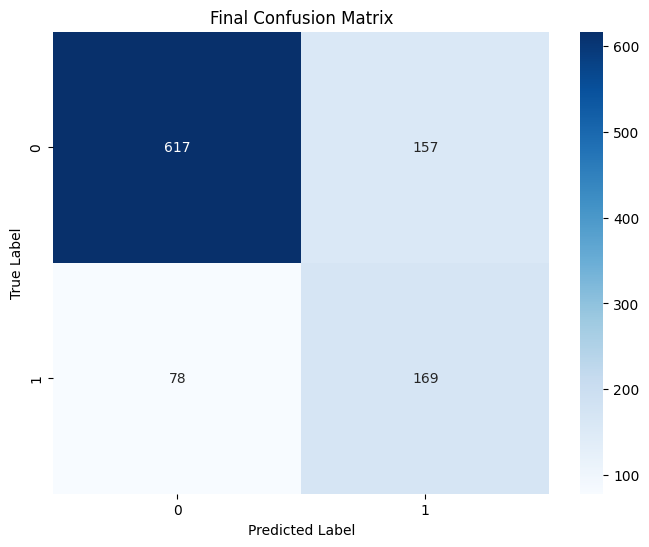

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import AutoTokenizer, AutoModel, get_cosine_schedule_with_warmup
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from tqdm import tqdm
from torch.optim import AdamW
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Set seeds for reproducibility
def set_seeds(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seeds()

class AdvancedHindiEnglishDataset(Dataset):
    def __init__(self, texts, labels, max_length=512, augment=False):
        self.texts = texts
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained("l3cube-pune/hing-roberta")
        self.max_length = max_length
        self.augment = augment

    def __len__(self):
        return len(self.texts)

    def augment_text(self, text):
        words = text.split()
        if len(words) < 2:
            return text

        # Random word replacement with mask token
        for i in range(len(words)):
            if random.random() < 0.15:
                words[i] = self.tokenizer.mask_token

        # Random word deletion
        if len(words) > 5 and random.random() < 0.1:
            words.pop(random.randint(0, len(words)-1))

        # Random word swap
        if len(words) > 3 and random.random() < 0.1:
            i = random.randint(0, len(words)-2)
            words[i], words[i+1] = words[i+1], words[i]

        return " ".join(words)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        if self.augment and random.random() < 0.7:
            text = self.augment_text(text)

        encoded = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoded['input_ids'].squeeze(),
            'attention_mask': encoded['attention_mask'].squeeze(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

class AdvancedXLMROBERTaClassifier(nn.Module):
    def __init__(self, dropout_rate=0.5, num_classes=1):
        super().__init__()
        self.roberta = AutoModel.from_pretrained("l3cube-pune/hing-roberta")

        # Freeze all layers initially
        for param in self.roberta.parameters():
            param.requires_grad = False

        # Attention mechanism
        self.attention = nn.MultiheadAttention(embed_dim=768, num_heads=8, dropout=dropout_rate)

        # Feature extractor with residual connection
        self.feature_extractor = nn.Sequential(
            nn.Linear(768, 1024),
            nn.LayerNorm(1024),
            nn.GELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(dropout_rate)
        )
        self.residual = nn.Linear(768, 512)  # For residual connection

        self.classifier = nn.Linear(512, num_classes)
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.classifier.weight)
        nn.init.zeros_(self.classifier.bias)
        for module in self.feature_extractor:
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.zeros_(module.bias)
        nn.init.xavier_uniform_(self.residual.weight)
        nn.init.zeros_(self.residual.bias)

    def unfreeze_layers(self, layers_to_unfreeze):
        for i in range(12 - layers_to_unfreeze, 12):
            for param in self.roberta.encoder.layer[i].parameters():
                param.requires_grad = True

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # [batch_size, 768]

        # Attention layer
        attn_output, _ = self.attention(
            pooled_output.unsqueeze(0),
            pooled_output.unsqueeze(0),
            pooled_output.unsqueeze(0)
        )
        attn_output = attn_output.squeeze(0)

        # Feature extraction with residual connection
        features = self.feature_extractor(attn_output)
        residual = self.residual(attn_output)
        features = features + residual  # Residual connection

        return self.classifier(features)

class FocalLossWithWeightBalancing(nn.Module):
    def __init__(self, alpha=0.75, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        at = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        focal_loss = at * (1 - pt) ** self.gamma * BCE_loss
        return torch.mean(focal_loss) if self.reduction == 'mean' else torch.sum(focal_loss)

def prepare_data(train_path, val_path, batch_size=16):
    train_df = pd.read_csv(train_path)
    val_df = pd.read_csv(val_path)

    # Oversampling for minority class
    minority_class = train_df['labels'].value_counts().idxmin()
    minority_samples = train_df[train_df['labels'] == minority_class]
    majority_samples = train_df[train_df['labels'] != minority_class]
    oversampled_minority = minority_samples.sample(n=len(majority_samples), replace=True, random_state=42)
    balanced_train_df = pd.concat([majority_samples, oversampled_minority]).sample(frac=1, random_state=42)

    print(f"Original Training: {len(train_df)}")
    print(f"Balanced Training: {len(balanced_train_df)}")

    train_dataset = AdvancedHindiEnglishDataset(
        balanced_train_df['clean_text'].values,
        balanced_train_df['labels'].values,
        augment=True
    )
    val_dataset = AdvancedHindiEnglishDataset(
        val_df['clean_text'].values,
        val_df['labels'].values,
        augment=False
    )

    train_labels = balanced_train_df['labels'].values
    class_weights = torch.tensor([
        len(train_labels) / (2 * sum(train_labels == 0)),
        len(train_labels) / (2 * sum(train_labels == 1))
    ], dtype=torch.float)
    samples_weights = torch.tensor([class_weights[int(t)] for t in train_labels])
    sampler = WeightedRandomSampler(samples_weights, len(samples_weights))

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        sampler=sampler,
        num_workers=0,
        pin_memory=True if torch.cuda.is_available() else False
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        pin_memory=True if torch.cuda.is_available() else False
    )

    return train_loader, val_loader, balanced_train_df, val_df

def compute_metrics(true_labels, pred_labels):
    return {
        'accuracy': accuracy_score(true_labels, pred_labels),
        'f1': f1_score(true_labels, pred_labels, zero_division=0),
        'precision': precision_score(true_labels, pred_labels, zero_division=0),
        'recall': recall_score(true_labels, pred_labels, zero_division=0)
    }

def train_model(model, train_loader, val_loader, device, num_epochs=15, accum_steps=2):
    optimizer = AdamW([
        {'params': model.roberta.parameters(), 'lr': 5e-5, 'weight_decay': 0.1},
        {'params': model.feature_extractor.parameters(), 'lr': 1e-4, 'weight_decay': 0.01},
        {'params': model.attention.parameters(), 'lr': 1e-4, 'weight_decay': 0.01},
        {'params': model.classifier.parameters(), 'lr': 1e-4, 'weight_decay': 0.01},
        {'params': model.residual.parameters(), 'lr': 1e-4, 'weight_decay': 0.01}
    ], eps=1e-8)

    total_steps = len(train_loader) * num_epochs // accum_steps
    scheduler = get_cosine_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(0.1 * total_steps),
        num_training_steps=total_steps
    )

    criterion = FocalLossWithWeightBalancing()
    best_f1 = 0
    patience = 5
    patience_counter = 0

    train_metrics_history = []
    val_metrics_history = []

    for epoch in range(num_epochs):
        if epoch == 2:
            model.unfreeze_layers(4)
        elif epoch == 5:
            model.unfreeze_layers(6)
        elif epoch == 8:
            model.unfreeze_layers(8)

        model.train()
        train_preds, train_labels = [], []
        total_train_loss = 0
        optimizer.zero_grad()

        for i, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask).squeeze()
            loss = criterion(outputs, labels) / accum_steps
            loss.backward()

            total_train_loss += loss.item() * accum_steps

            if (i + 1) % accum_steps == 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()

            preds = (torch.sigmoid(outputs) > 0.5).cpu().numpy()
            train_preds.extend(preds)
            train_labels.extend(labels.cpu().numpy())

        model.eval()
        val_preds, val_labels = [], []
        total_val_loss = 0

        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Validation {epoch+1}/{num_epochs}"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask).squeeze()
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                preds = (torch.sigmoid(outputs) > 0.5).cpu().numpy()
                val_preds.extend(preds)
                val_labels.extend(labels.cpu().numpy())

        train_metrics = compute_metrics(train_labels, train_preds)
        val_metrics = compute_metrics(val_labels, val_preds)
        train_metrics['loss'] = total_train_loss / len(train_loader)
        val_metrics['loss'] = total_val_loss / len(val_loader)

        train_metrics_history.append(train_metrics)
        val_metrics_history.append(val_metrics)

        print(f"\nEpoch {epoch+1}")
        print(f"Train Loss: {train_metrics['loss']:.4f}, Accuracy: {train_metrics['accuracy']:.4f}, "
              f"F1: {train_metrics['f1']:.4f}, Precision: {train_metrics['precision']:.4f}, "
              f"Recall: {train_metrics['recall']:.4f}")
        print(f"Val Loss: {val_metrics['loss']:.4f}, Accuracy: {val_metrics['accuracy']:.4f}, "
              f"F1: {val_metrics['f1']:.4f}, Precision: {val_metrics['precision']:.4f}, "
              f"Recall: {val_metrics['recall']:.4f}")

        if val_metrics['f1'] > best_f1:
            best_f1 = val_metrics['f1']
            torch.save(model.state_dict(), 'best_model.pt')
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    # Plot metrics
    epochs = range(1, len(train_metrics_history) + 1)
    metrics = ['loss', 'accuracy', 'f1', 'precision', 'recall']
    plt.figure(figsize=(15, 10))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        plt.plot(epochs, [m[metric] for m in train_metrics_history], label=f'Train {metric}')
        plt.plot(epochs, [m[metric] for m in val_metrics_history], label=f'Val {metric}')
        plt.title(f'{metric.capitalize()} over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
    plt.tight_layout()
    plt.show()

    return model

def main():
    train_path = "/content/Racial_train.csv"  # Adjust path as needed
    val_path = "/content/Racial_val.csv"      # Adjust path as needed

    if not os.path.exists(train_path) or not os.path.exists(val_path):
        raise FileNotFoundError("Data files not found. Please check paths.")

    train_loader, val_loader, train_df, val_df = prepare_data(train_path, val_path)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    model = AdvancedXLMROBERTaClassifier().to(device)
    model = train_model(model, train_loader, val_loader, device)

    model.load_state_dict(torch.load('best_model.pt', weights_only=True))
    model.eval()

    all_preds, all_labels = [], []
    all_probs = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Final Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].cpu().numpy()

            outputs = model(input_ids, attention_mask).squeeze()
            probs = torch.sigmoid(outputs).cpu().numpy()
            preds = (probs > 0.5).astype(int)

            all_probs.extend(probs)
            all_preds.extend(preds)
            all_labels.extend(labels)

    # Optimize threshold
    thresholds = np.linspace(0.1, 0.9, 20)
    best_f1, best_thresh = 0, 0.5
    for thresh in thresholds:
        preds = (np.array(all_probs) > thresh).astype(int)
        f1 = f1_score(all_labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    final_preds = (np.array(all_probs) > best_thresh).astype(int)

    # Final metrics
    final_metrics = compute_metrics(all_labels, final_preds)
    print("\nFinal Metrics (with optimal threshold):")
    print(f"Threshold: {best_thresh:.4f}")
    for metric, value in final_metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, final_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Final Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

if __name__ == "__main__":
    main()

In [5]:
import torch
import pandas as pd
from transformers import AutoTokenizer

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AdvancedXLMROBERTaClassifier().to(device)
model.load_state_dict(torch.load('/content/best_model.pt', map_location=device))
model.eval()

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("l3cube-pune/hing-roberta")

# Function to make predictions
def predict_labels(input_texts, threshold=0.5):
    predictions = []
    with torch.no_grad():
        for text in input_texts:
            encoded = tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
            input_ids = encoded['input_ids'].to(device)
            attention_mask = encoded['attention_mask'].to(device)

            output = model(input_ids, attention_mask).squeeze()
            prob = torch.sigmoid(output).cpu().item()
            pred_label = 1 if prob > threshold else 0
            predictions.append(pred_label)
    return predictions

# Load new dataset
data_path = "/content/Racial_test_without_labels.csv"  # Change this to your dataset path
df = pd.read_csv(data_path)

# Predict labels
df['predicted_label'] = predict_labels(df['clean_text'].values)




Some weights of XLMRobertaModel were not initialized from the model checkpoint at l3cube-pune/hing-roberta and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predictions saved to predicted_dataset.csv


In [6]:
df

,ID,clean_text,predicted_label
0,RH_01,"jai hind , in namuno ko bat bhi karni nahi ati...",0
1,RH_02,sasta nasha karna band karo bhaikis mandir me ...,0
2,RH_03,ap insaniyat wali patrakarita karte hai ap bah...,0
3,RH_04,didi kya likh rhi ho kya smjha rhi ho pta hi n...,0
4,RH_05,humesa christian ka hen against kerney mein bu...,0
...,...,...,...
1016,RH_1017,"yeh khel to north east me regular chalta hai ,...",1
1017,RH_1018,"bjp kerela se har rhi hai to , ab ye faltu ki ...",0
1018,RH_1019,"amir khan , naserudin shah , shahrukh khan jai...",1
1019,RH_1020,mai ek muslim hu hatwao aese mazaro ko ye isla...,0


In [7]:
df.drop(columns=['clean_text'], inplace=True)
# Save predictions
df

,ID,predicted_label
0,RH_01,0
1,RH_02,0
2,RH_03,0
3,RH_04,0
4,RH_05,0
...,...,...
1016,RH_1017,1
1017,RH_1018,0
1018,RH_1019,1
1019,RH_1020,0


In [8]:
df.to_csv("predicted_dataset.csv", index=False)
print("Predictions saved to predicted_dataset.csv")

Predictions saved to predicted_dataset.csv
